
A solution to this exercise is in chap07soln.py.
Exercise 7.1 Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you charac- terize the relationship between these variables?

In [29]:
#libraries
import nsfg
import thinkstats2 as ts
import thinkplot as tp
import pandas as pd
import numpy as np

In [21]:
#read in the df
preg = nsfg.ReadFemPreg()

# live births only
live = preg[preg.outcome == 1]
live = live[['agepreg', 'totalwgt_lb']].dropna()

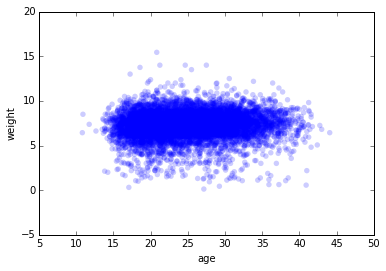

In [22]:
#Scatter plot
tp.Scatter(live.agepreg,live.totalwgt_lb)
tp.Config(xlabel='age', ylabel='weight')

In [27]:
#Let's get binned ages using pd.cut
# 12 is the number of bins in the solution formula
binned_ages = pd.cut(live.agepreg, bins=12, retbins=True) 


In [31]:
#okay - back to binned percentile function
def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [ts.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    tp.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        tp.Plot(ages, weights, label=label)

    tp.Save(root='chap07scatter3',
                   formats=['jpg'],
                   xlabel="mother's age (years)",
                   ylabel='birth weight (lbs)')

In [32]:
BinnedPercentiles(live)

Writing chap07scatter3.jpg


In [40]:
ages = live.agepreg
weights = live.totalwgt_lb
print 'TS Corr', round(ts.Corr(ages, weights), 3)
print 'TS Sprearman Corr', round(ts.SpearmanCorr(ages, weights), 3)

TS Corr 0.069
TS Sprearman Corr 0.095
